# Data Preprocessing

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
path = os.getcwd()
path = path.replace('data_preprocessing', 'resources')
files = os.listdir(path)
for file in files:
    if len(file.split('.csv'))>1:
        csv_path = path+'/'+file

In [3]:
data = pd.read_csv(csv_path)
data['date']=pd.to_datetime(data['date'])

In [4]:
data.head()

,date,domestic_market_contract_low,export_market_spot,domestic_market_spot,wtisplc,mcoilbrenteu,gasregm,impch,expch,prubbusdm,...,india_import,russia_import,south_africa_import,turkey_import,brazil_import,france_import,germany_import,united_kingdom_import,china_import,japan_import
0,2000-01-01,41.0,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,...,NaN,NaN,NaN,6833222.0,2649293.0,35239920.0,NaN,NaN,NaN,NaN
1,2000-02-01,41.0,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,...,NaN,NaN,NaN,5647987.0,2787667.0,36716752.0,NaN,NaN,NaN,NaN
2,2000-03-01,45.0,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,...,NaN,NaN,NaN,6721125.0,4692701.0,45144561.0,NaN,NaN,NaN,NaN
3,2000-04-01,47.0,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,...,NaN,NaN,NaN,7169182.0,2565068.0,32240349.0,NaN,NaN,NaN,NaN
4,2000-05-01,47.0,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,...,NaN,NaN,NaN,10466333.0,4671325.0,29351633.0,NaN,NaN,NaN,NaN


In [5]:
# Import feature names dictionary
import json
filename = path+'/feature_dictionary.json'

# Write the dictionary to a file in JSON format
with open(filename, 'r') as f:
    feature_dictionary = json.load(f)

In [6]:
pd.DataFrame(feature_dictionary).T

,0,1
WTISPLC,OIL & GAS,Spot Crude Oil Price: West Texas Intermediate ...
MCOILBRENTEU,OIL & GAS,Crude Oil Prices: Brent - Europe
GASREGM,OIL & GAS,US Regular All Formulations Gas Price
IMPCH,OIL & GAS,U.S. Imports of Goods by Customs Basis from China
EXPCH,OIL & GAS,U.S. Exports of Goods by F.A.S. Basis to Mainl...
PRUBBUSDM,OIL & GAS,Global price of Rubber
WPUFD4111,PLASTICS,Producer Price Index by Commodity: Final Deman...
PCU325211325211,PLASTICS,Producer Price Index by Industry: Plastics Mat...
PCU32611332611301,PLASTICS,Producer Price Index by Industry: Nonpackaging...
WPU0915021625,PLASTICS,"Producer Price Index by Commodity: Pulp, Paper..."


### Missing values

In [7]:
print("Percentage of missing data (Part A): \n")
round(data.iloc[:,:21].isnull().mean()*100,2)

Percentage of missing data (Part A): 



date                             0.00
domestic_market_contract_low     0.00
export_market_spot              32.97
domestic_market_spot            54.71
wtisplc                          0.00
mcoilbrenteu                     0.00
gasregm                          0.00
impch                            0.36
expch                            0.36
prubbusdm                        0.36
wpufd4111                        0.36
pcu325211325211                  0.36
pcu32611332611301               26.09
wpu0915021625                   52.17
pcu3252132521                   17.39
mhhngsp                          0.00
wpu072205011                    58.33
pcu32611132611115               58.33
pcu32611132611112               58.33
wpu0915021622                   51.81
pcu3252113252111                 0.00
dtype: float64

In [8]:
print("Percentage of missing data (Part B): \n")
round(data.iloc[:,21:].isnull().mean()*100,2)

Percentage of missing data (Part B): 



australia_export         87.32
canada_export            44.20
saudi_export             88.04
usa_export               44.20
india_export             48.55
russia_export            60.87
south_africa_export      44.20
turkey_export             1.45
brazil_export             0.36
france_export            13.04
germany_export           35.51
united_kingdom_export    44.57
china_export             60.87
australia_import         60.51
canada_import            44.20
saudi_import             88.04
usa_import               44.20
india_import             48.55
russia_import            60.87
south_africa_import      44.20
turkey_import            39.13
brazil_import            39.13
france_import            13.04
germany_import           35.51
united_kingdom_import    44.20
china_import             60.87
japan_import             44.57
dtype: float64

#### Correlation check

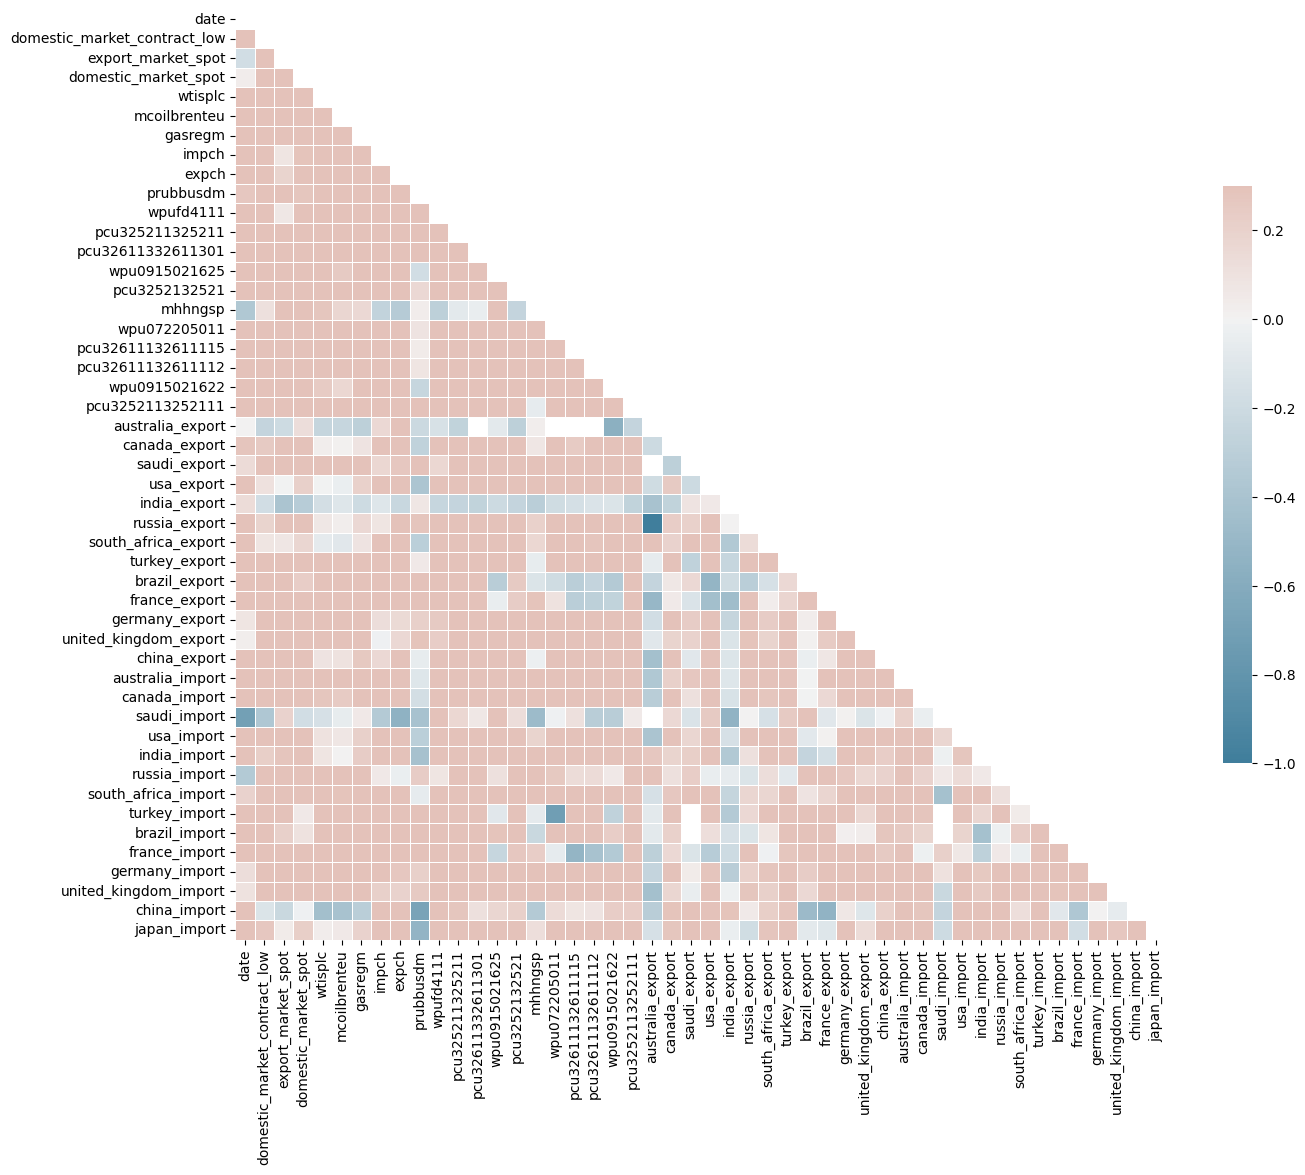

In [9]:

corr_matrix = data.corr()

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Features with less than 2% missing values

In [10]:
lessthan2_missing = data.isnull().mean()[(data.isnull().mean()<0.02) & (data.isnull().mean()>0)].index


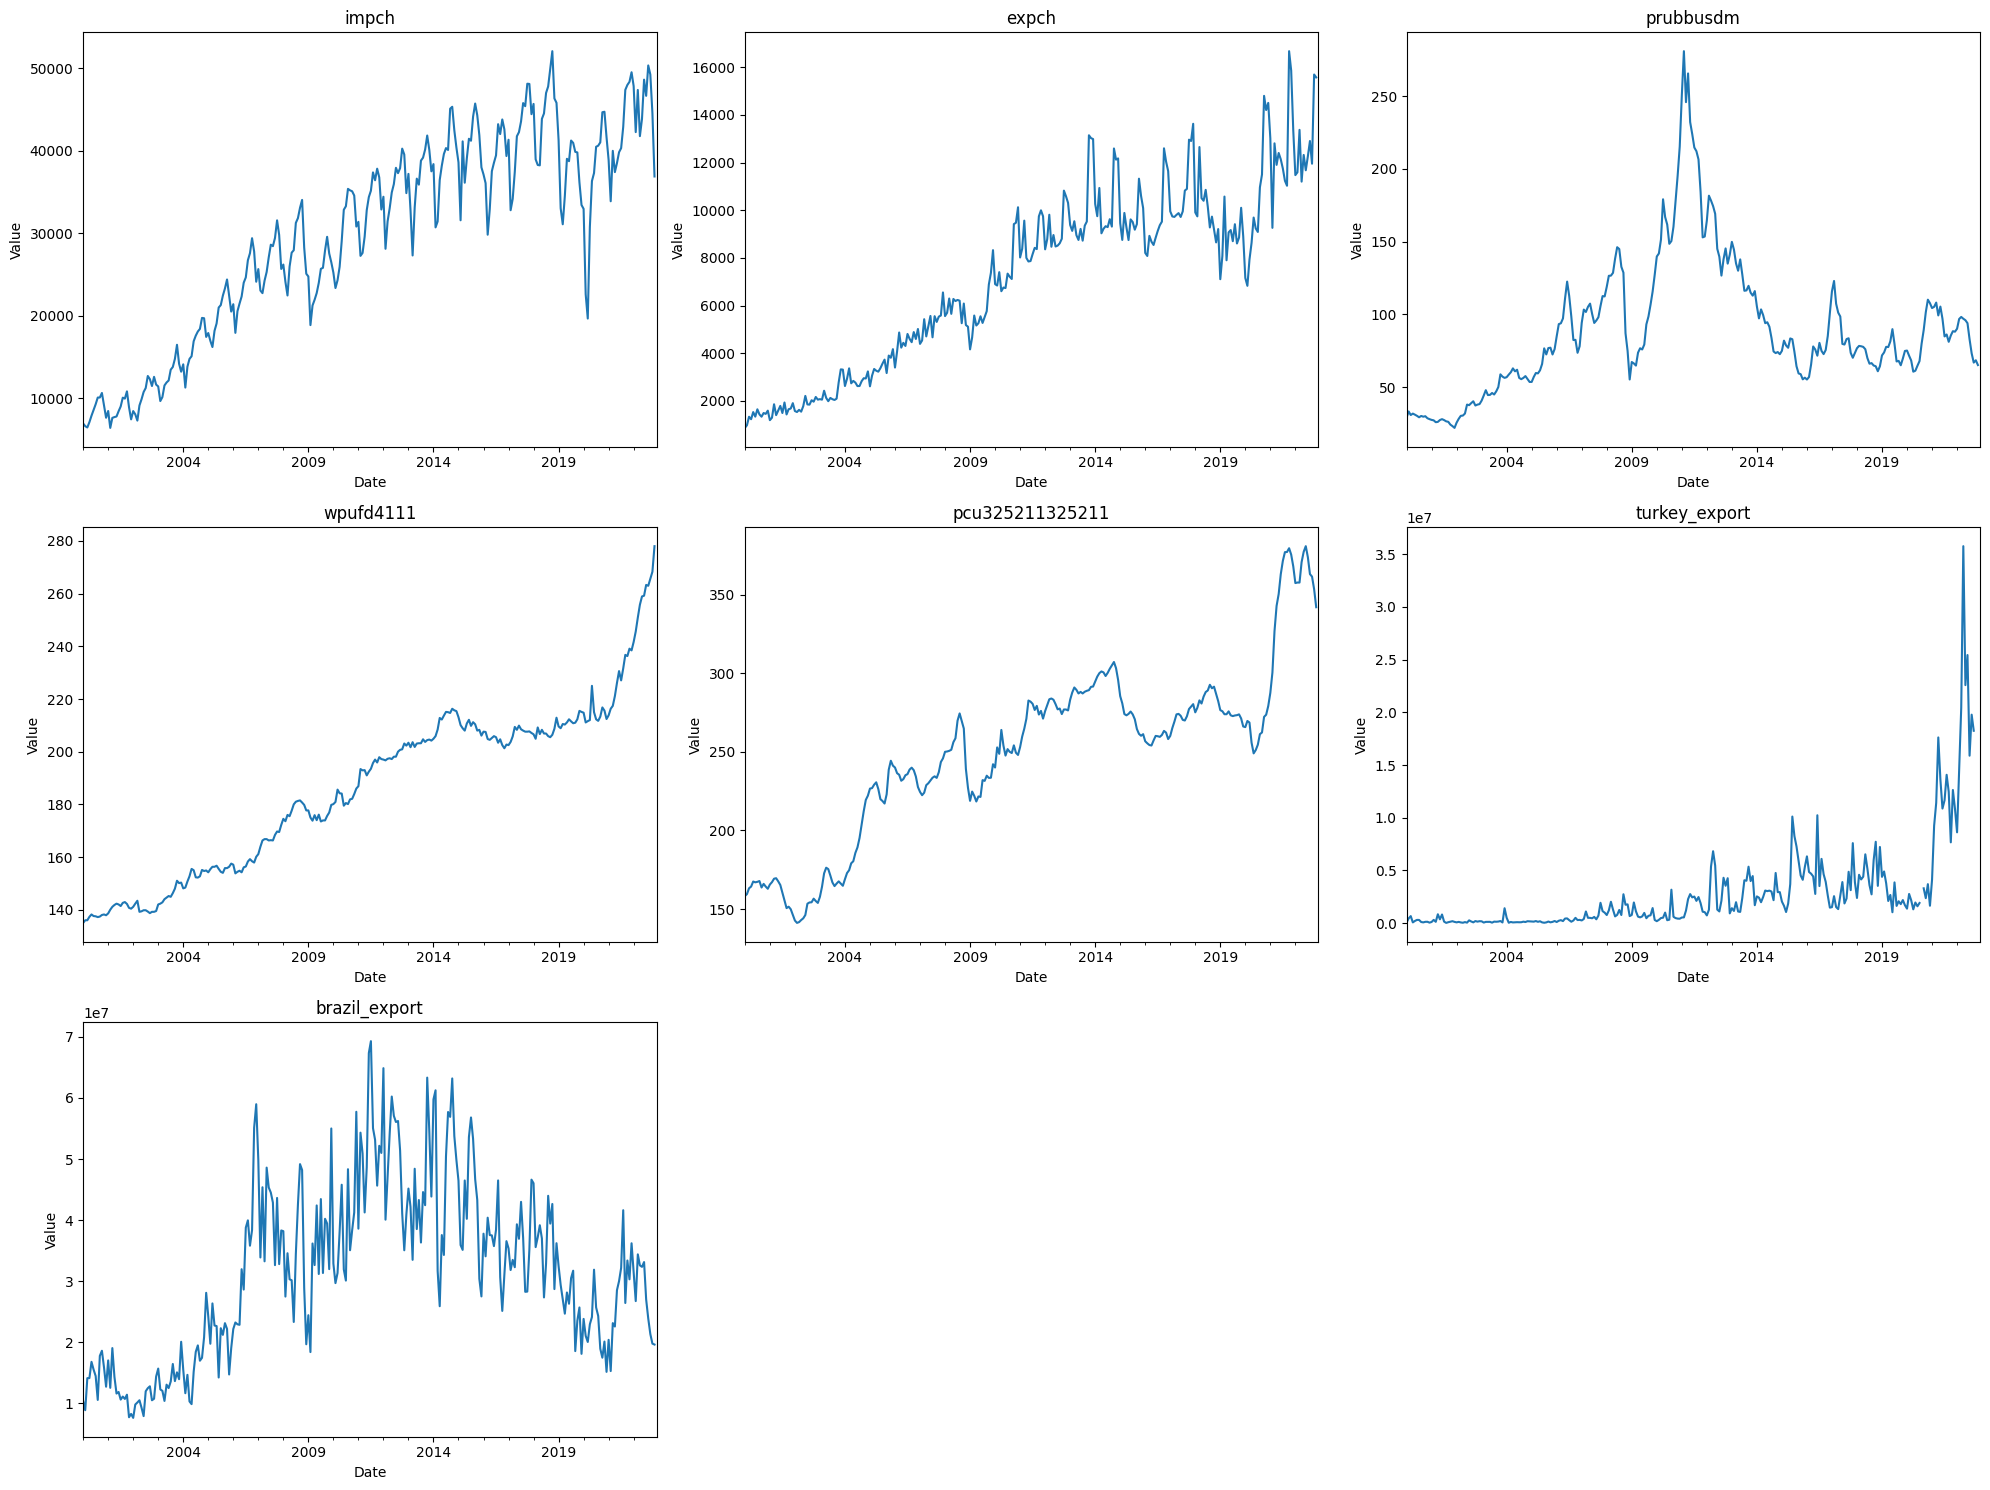

In [11]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

features = list(lessthan2_missing)
ncols=3
nrows=len(features)//3+1
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Iterate over the features and plot them

for i, feature in enumerate(features):
    ax = axes[i//ncols, i%ncols]
    data.plot(x='date', y=feature, ax=ax, legend=False)
    ax.set_title(feature)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

if len(features) < nrows * ncols:
    for i in range(len(features), nrows * ncols):
        fig.delaxes(axes[i // ncols, i % ncols])

plt.tight_layout()
plt.show()

In [12]:
# We will use linear interpolation to fill misisng values for features with less than 2% missing.
data[lessthan2_missing]=data[lessthan2_missing].interpolate(method='linear')

In [13]:
data[lessthan2_missing].iloc[-1,:].astype(int)

impch                 36876
expch                 15576
prubbusdm                65
wpufd4111               278
pcu325211325211         341
turkey_export      18255991
brazil_export      19595788
Name: 275, dtype: int64

### First and Last Observations
Some of the afeatures start recording observations later than other features. We can check when each features first starts recodrding observations, as we are mainly interested in predicting furture prices.

In [14]:
def first_last_obs(data):
    first_non_null = {}
    features_missing_vals = data.isnull().mean()[(data.isnull().mean()>0)].index
    for column in data[features_missing_vals].columns:
        first_non_null[column] = data.date[data[column].first_valid_index()].strftime('%m-%Y')

    last_non_null = {}
    features_missing_vals = data.isnull().mean()[(data.isnull().mean()>0)].index
    for column in data[features_missing_vals].columns:
        if data.date[data[column].last_valid_index()] < data.date.iloc[-2]: # last row is missing for several features
            last_non_null[column] = data.date[data[column].last_valid_index()].strftime('%m-%Y')
    
    compare_start_end = pd.DataFrame(columns=['Start_Date', 'End_Date'], index = data.columns)
    compare_start_end['Start_Date']=first_non_null
    compare_start_end['End_Date']=last_non_null

    return compare_start_end



In [15]:
round(data.isnull().mean()*100,2)

date                             0.00
domestic_market_contract_low     0.00
export_market_spot              32.97
domestic_market_spot            54.71
wtisplc                          0.00
mcoilbrenteu                     0.00
gasregm                          0.00
impch                            0.00
expch                            0.00
prubbusdm                        0.00
wpufd4111                        0.00
pcu325211325211                  0.00
pcu32611332611301               26.09
wpu0915021625                   52.17
pcu3252132521                   17.39
mhhngsp                          0.00
wpu072205011                    58.33
pcu32611132611115               58.33
pcu32611132611112               58.33
wpu0915021622                   51.81
pcu3252113252111                 0.00
australia_export                87.32
canada_export                   44.20
saudi_export                    88.04
usa_export                      44.20
india_export                    48.55
russia_expor

In [16]:
missing_values = first_last_obs(data)
missing_values = pd.concat([missing_values, round(data.isnull().mean()*100,2)], axis=1)
missing_values

,Start_Date,End_Date,0
date,NaN,NaN,0.00
domestic_market_contract_low,NaN,NaN,0.00
export_market_spot,01-2007,05-2022,32.97
domestic_market_spot,01-2012,05-2022,54.71
wtisplc,NaN,NaN,0.00
mcoilbrenteu,NaN,NaN,0.00
gasregm,NaN,NaN,0.00
impch,NaN,NaN,0.00
expch,NaN,NaN,0.00
prubbusdm,NaN,NaN,0.00


In [17]:
feature_dictionary['wpu0915021625'.upper()]

['PLASTICS',
 'Producer Price Index by Commodity: Pulp, Paper, and Allied Products: Other Polyethylene Bags, Pouches, and Liners']

We can remove countries whose import export info cut off early, we can aslo remove countries whose missing values are over 50%


In [18]:
missing_values = missing_values.reset_index()
missing_values = missing_values.rename(columns = dict(zip(missing_values.columns, ['Feature', 'Start_Date', 'End_Date', 'Missing'])))


In [19]:
missing_values.tail()

,Feature,Start_Date,End_Date,Missing
45,united_kingdom_import,01-2010,10-2022,44.20
46,china_import,01-2010,03-2022,60.87
47,japan_import,01-2010,09-2022,44.57
48,month,NaN,NaN,0.00
49,year,NaN,NaN,0.00


In [20]:
over50_miss = missing_values[missing_values.Missing>50]['Feature']

features_toremove = over50_miss[over50_miss.str.endswith("_export")].values.tolist()+over50_miss[over50_miss.str.endswith("_import")].values.tolist()
features_toremove

['australia_export',
 'saudi_export',
 'russia_export',
 'china_export',
 'australia_import',
 'saudi_import',
 'russia_import',
 'china_import']

In [21]:
ends_before_2022 = missing_values[~missing_values['End_Date'].fillna('2022').str.endswith("2022")].Feature.values.tolist()
ends_before_2022

['australia_export',
 'saudi_export',
 'russia_export',
 'france_export',
 'saudi_import',
 'russia_import',
 'turkey_import',
 'brazil_import',
 'france_import']

In [22]:
features_toremove = list(set(features_toremove+ends_before_2022))


In [23]:
features_toremove

['saudi_export',
 'france_import',
 'france_export',
 'brazil_import',
 'australia_export',
 'china_export',
 'saudi_import',
 'china_import',
 'russia_import',
 'australia_import',
 'turkey_import',
 'russia_export']

For the remainig features, we can see if we need to impute the features or remove it during modeling.

In [24]:
data_preprocessed = data.drop(features_toremove+['month', 'year'], axis=1)
data_preprocessed

,date,domestic_market_contract_low,export_market_spot,domestic_market_spot,wtisplc,mcoilbrenteu,gasregm,impch,expch,prubbusdm,...,brazil_export,germany_export,united_kingdom_export,canada_import,usa_import,india_import,south_africa_import,germany_import,united_kingdom_import,japan_import
0,2000-01-01,41.0,NaN,NaN,27.18,25.51,1.289,6902.100000,863.100000,29.207387,...,10352529.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,41.0,NaN,NaN,29.35,27.78,1.377,6584.400000,972.700000,33.391099,...,8844172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-03-01,45.0,NaN,NaN,29.89,27.49,1.516,6424.100000,1330.500000,30.941913,...,14091209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,47.0,NaN,NaN,25.74,22.76,1.465,7070.500000,1227.500000,31.930148,...,14097518.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-05-01,47.0,NaN,NaN,28.78,27.74,1.487,7850.200000,1526.300000,31.201702,...,16762995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2022-08-01,93.0,NaN,NaN,93.67,100.45,3.975,50348.836582,12906.699996,73.304558,...,23870136.0,136630959.0,32000512.0,61120653.0,142831470.0,120324617.0,19310108.0,144131334.0,81872550.0,26097012.0
272,2022-09-01,90.0,NaN,NaN,84.26,89.76,3.700,49247.891499,11953.510580,66.956499,...,21317329.0,145081910.0,43680408.0,72844563.0,107230475.0,156434480.0,14410445.0,113310929.0,74477441.0,21277339.0
273,2022-10-01,90.0,NaN,NaN,87.55,93.33,3.815,44571.967124,15698.339652,68.535729,...,19748369.0,135796605.0,NaN,60681920.0,135550402.0,155159512.0,16783023.0,119307001.0,109421098.0,NaN
274,2022-11-01,90.0,NaN,NaN,84.37,91.42,3.685,36876.437049,15576.005996,65.265834,...,19595788.0,NaN,NaN,NaN,NaN,NaN,11079039.0,NaN,NaN,NaN


### Export Processed data


In [25]:
# Export data to csv
csv_filename = os.getcwd() + '/blow_molding_market_preprocessed.csv'
data_preprocessed.to_csv(csv_filename, index=False)